# Feature Engineering

-   Create new features based on insights from EDA
-   Handle categorical variables (encoding)
-   Normalize or standardize numerical features
-   Feature selection

## Feature Ideas
-   [ ] Regular vs post-season: make sure consistent with Notes, which seemd to flag some regular season games as championship games

In [51]:
%load_ext autoreload
%autoreload 2

import sys
import os
import pandas as pd

# Add the project root to the Python path
notebook_dir = os.path.dirname(os.path.abspath('__file__'))
project_root = os.path.dirname(notebook_dir)
sys.path.append(project_root)

from src.data.feature_eng import (
    select_mvp_features,
    calculate_team_vs_team_win_rate
)

from src.data.cleaning import (
    analyze_distribution
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
# Load the games data from the parquet file
df = pd.read_parquet('../data/clean_team_data.parquet')

In [74]:
mvp_features_df = select_mvp_features(df)

KeyError: "['matchup'] not in index"

In [70]:
temp_df = df.copy()
temp_df['win_rate'] = calculate_team_vs_team_win_rate(temp_df)

In [72]:
temp_df.sort_values('start_date', ascending=False).head(10)['win_rate'].value_counts(dropna=False)

win_rate
0.000000    3
1.000000    3
0.500000    2
0.666667    1
0.333333    1
Name: count, dtype: int64

In [69]:
# Create a new DataFrame 'check' from 'df'
check = df[['matchup', 'team_id', 'opponent_id', 'win']].copy()

# Extract team IDs from the matchup tuple
check['a'] = check['matchup'].apply(lambda x: x[0])
check['b'] = check['matchup'].apply(lambda x: x[1])

# Initialize columns for wins
check['a_wins'] = 0
check['b_wins'] = 0

# Update 'a_wins' when team_id == a and win == 1 or opponent_id == a and win == 0
check.loc[((check['team_id'] == check['a']) & (check['win'] == 1)) | 
          ((check['opponent_id'] == check['a']) & (check['win'] == 0)), 'a_wins'] = 1

# Update 'b_wins' when team_id == b and win == 1 or opponent_id == b and win == 0
check.loc[((check['team_id'] == check['b']) & (check['win'] == 1)) | 
          ((check['opponent_id'] == check['b']) & (check['win'] == 0)), 'b_wins'] = 1

# Group by matchup and sum the wins for each team
check = check.groupby('matchup').agg({'a_wins': 'sum', 'b_wins': 'sum'}).reset_index()

# Display the resulting DataFrame
display(check.head())

,matchup,a_wins,b_wins
0,"(2, 8)",4,2
1,"(2, 23)",2,0
2,"(2, 25)",8,0
3,"(2, 61)",0,6
4,"(2, 98)",2,0


In [66]:
# Check the data type of the 'matchup' column
print("Data type of 'matchup' column:")
print(type(df['matchup']))

# Display more information about the 'matchup' column
print("\nDetailed information about 'matchup' column:")
print(df['matchup'].info())

# Show a few example values from the 'matchup' column
print("\nExample values from 'matchup' column:")
print(df['matchup'].head())

Data type of 'matchup' column:
<class 'pandas.core.series.Series'>

Detailed information about 'matchup' column:
<class 'pandas.core.series.Series'>
RangeIndex: 3346 entries, 0 to 3345
Series name: matchup
Non-Null Count  Dtype 
--------------  ----- 
3346 non-null   object
dtypes: object(1)
memory usage: 26.3+ KB
None

Example values from 'matchup' column:
0    (189, 2633)
1     (96, 2433)
2       (8, 242)
3    (333, 2390)
4    (333, 2390)
Name: matchup, dtype: object


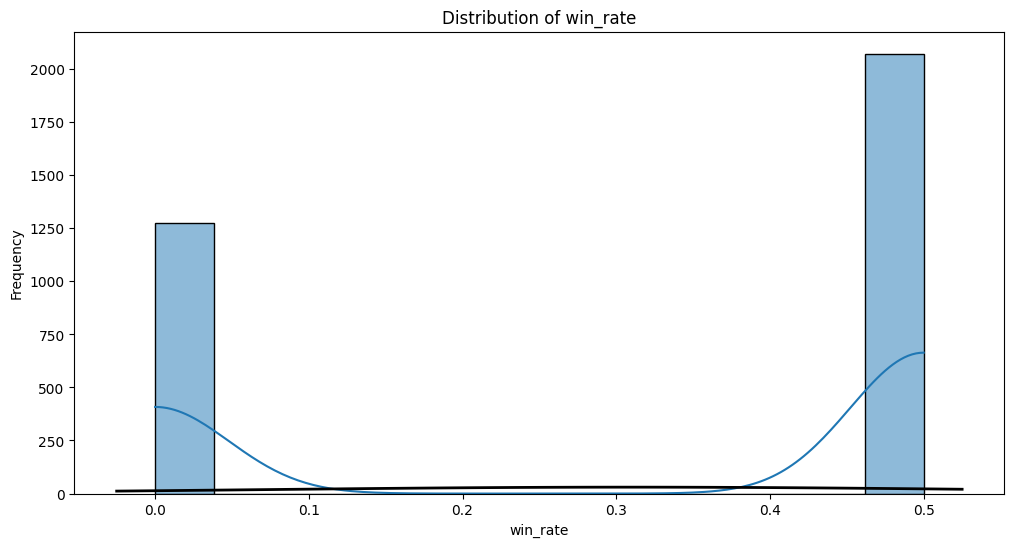

Shapiro-Wilk test - statistic: 0.6156, p-value: 0.0000
Skewness: -0.4914
Kurtosis: -1.7596


In [55]:
analyze_distribution(temp_df, 'win_rate')

In [28]:
# Count the amount of each matchup
matchup_counts = df.matchup.value_counts()
print("Matchup counts:")
display(matchup_counts.head())

Matchup counts:


matchup
(96, 97)       24
(77, 150)      24
(59, 61)       24
(52, 57)       24
(228, 2579)    24
Name: count, dtype: int64